# Import Python libs

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix, roc_curve, precision_score, recall_score, f1_score

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Lab: Perceptron

(10000, 2)


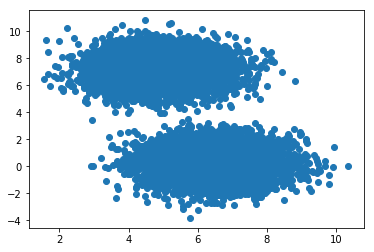

In [2]:
# Create blobs
blobs, labels = make_blobs(n_samples = 10000, centers = 2, n_features = 2)
print(blobs.shape)
plt.scatter(blobs[:, 0], blobs[:, 1])

In [3]:
# Split darta
blobs_train, blobs_test, labels_train, labels_test = train_test_split(blobs, labels, train_size = 0.7)

- ### With not tuned model

In [4]:
# Create and train model
perceptron = Perceptron()
perceptron.fit(blobs_train, labels_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
# Score both in-sample and out-of-sample data
print(perceptron.score(blobs_train, labels_train))
print(perceptron.score(blobs_test, labels_test))

0.999857142857
1.0


In [6]:
predicted = perceptron.predict(blobs_test)
print(confusion_matrix(labels_test, predicted))

[[1503    0]
 [   0 1497]]


- ### With tuned model

In [7]:
tuned_perceptron = Perceptron()

params = {"penalty": [ None, "L1", "L2"], "alpha": 10.0 ** - np.arange(1, 7) }
grid = GridSearchCV(tuned_perceptron, params)
grid.fit(blobs_train, labels_train)

tuned_perceptron = grid.best_estimator_
tuned_perceptron.fit(blobs_train, labels_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty='L1', random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [8]:
print(tuned_perceptron.score(blobs_train, labels_train))
print(tuned_perceptron.score(blobs_test, labels_test))

0.999
1.0


In [9]:
tuned_predicted = tuned_perceptron.predict(blobs_test)
print(confusion_matrix(labels_test, tuned_predicted))

[[1503    0]
 [   0 1497]]


# Lab: Classifying Handwritten Digits (MNIST dataset)

In [10]:
mnist = pd.read_csv("mnist.csv")

mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# get 20% of all data
mnist_data, _, mnist_labels, __ = train_test_split(mnist.drop("label", axis = 1), mnist.label, train_size = 0.2)

print(mnist_data.shape)
print(mnist_labels.shape)

(8400, 784)
(8400,)


In [12]:
# split data
mnist_train, mnist_test, labels_train, labels_test = train_test_split(mnist_data, mnist_labels, train_size = 0.7)

print(mnist_train.shape)
print(mnist_test.shape)

(5880, 784)
(2520, 784)


- ### With default params

In [13]:
nn = MLPClassifier()
nn.fit(mnist_train, labels_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [14]:
print("Train accuracy score: " + str(nn.score(mnist_train, labels_train)))
print("Test accuracy score: "+ str(nn.score(mnist_test, labels_test)))

predicted = nn.predict(mnist_test)
print("Test precision score: " + str(precision_score(labels_test, predicted, average = "weighted")))
print("Test recall score: " + str(recall_score(labels_test, predicted, average = "weighted")))
print("Test f1 score: " + str(f1_score(labels_test, predicted, average = "weighted")))
print(confusion_matrix(labels_test, predicted))

Train accuracy score: 1.0
Test accuracy score: 0.867857142857
Test precision score: 0.868171859147
Test recall score: 0.867857142857
Test f1 score: 0.867667075012
[[232   0   5   1   0   3   3   0   4   0]
 [  1 261   1   3   3   2   0   0   4   0]
 [  3   6 209   7   4   0   3   5   7   1]
 [  2   3  15 236   0  11   0   3   5   7]
 [  0   1   1   0 216   0   2   3   1  16]
 [  6   3   4  10   1 198   6   1  10   8]
 [  4   1   3   1   3   4 221   0   4   1]
 [  0   4   8   0   4   0   1 224   2  15]
 [  3   6  10   6   2  12   4   4 199   5]
 [  1   0   3   6  13   1   0  13   4 191]]


- ### With selected params

In [15]:
nn2 = MLPClassifier(hidden_layer_sizes = (33, 33, 33))
nn2.fit(mnist_train, labels_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(33, 33, 33), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [16]:
print("Train accuracy score: " + str(nn2.score(mnist_train, labels_train)))
print("Test accuracy score: "+ str(nn2.score(mnist_test, labels_test)))

predicted = predicted = nn2.predict(mnist_test)
print("Test precision score: " + str(precision_score(labels_test, predicted, average = "weighted")))
print("Test recall score: " + str(recall_score(labels_test, predicted, average = "weighted")))
print("Test f1 score: " + str(f1_score(labels_test, predicted, average = "weighted")))
print(confusion_matrix(labels_test, predicted))

Train accuracy score: 0.980952380952
Test accuracy score: 0.855555555556
Test precision score: 0.855925127387
Test recall score: 0.855555555556
Test f1 score: 0.855443015338
[[232   0   1   3   0   3   3   0   5   1]
 [  0 264   3   1   1   1   0   1   4   0]
 [  2   1 207   9   8   1   3   3  10   1]
 [  4   3  10 221   1  22   1   5  13   2]
 [  1   0   0   0 205   0   4   3   0  27]
 [  2   1   1  34   5 183   3   2  10   6]
 [  2   0   2   2   5   5 223   0   3   0]
 [  0   3   3   2   5   1   2 226   4  12]
 [  8   5   9  12   5  11   2   0 196   3]
 [  1   1   1   5   8   3   1   8   5 199]]


- ### With tuned params

In [17]:
nn3 = MLPClassifier()
params = {"hidden_layer_sizes": [(50, 50), (25, 25, 25, 25), (20, 20, 20, 20, 20), (10, 30, 20, 30, 10)]}
grid = GridSearchCV(nn3, params, cv = 10)
grid.fit(mnist_train, labels_train)

print(grid.best_estimator_)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [18]:
nn3 = grid.best_estimator_
print("Train accuracy score: " + str(nn3.score(mnist_train, labels_train)))
print("Test accuracy score: "+ str(nn3.score(mnist_test, labels_test)))

predicted = predicted = nn3.predict(mnist_test)
print("Test precision score: " + str(precision_score(labels_test, predicted, average = "weighted")))
print("Test recall score: " + str(recall_score(labels_test, predicted, average = "weighted")))
print("Test f1 score: " + str(f1_score(labels_test, predicted, average = "weighted")))
print(confusion_matrix(labels_test, predicted))

Train accuracy score: 0.957482993197
Test accuracy score: 0.873015873016
Test precision score: 0.875357018097
Test recall score: 0.873015873016
Test f1 score: 0.872888660105
[[233   0   3   1   3   0   7   0   1   0]
 [  0 257   3   1   0   0   1   3   9   1]
 [  1   4 220   3   2   1   4   6   4   0]
 [  1   2   3 244   0   8   1   1  14   8]
 [  0   0   1   1 221   0   3   1   2  11]
 [  2   0   3  28   5 184   4   0  19   2]
 [  6   0   4   1   5   3 220   0   3   0]
 [  0   5   5   3   4   1   0 215   2  23]
 [  2   4   8   8   5   5   6   1 207   5]
 [  1   0   0   5  16   2   1   7   1 199]]
